Programming Exercise 2: Logistic Regression
============

In this exercise, you will implement logistic regression and apply it to
two different datasets. Before starting on the programming exercise, we
strongly recommend watching the video lectures and completing the review
questions for the associated topics. Throughout this exercise, you will be asked to complete the following functions: 

- sigmoid: Sigmoid Function 
- costFunction: Logistic Regression Cost Function
- predict: Logistic Regression Prediction Function
- costFunctionReg: Regularized Logistic Regression Cost

**Instructions**:

For each function, we have provided starter code for you. You will find a description of the problems followed by a cell which contains some code. You will have to write your own code in these cells to complete the four functions mentioned above. Once you run the cells, your output would be displayed. If it matches the expected output, then you should continue with the next part of the exercise, else, you would have to try again. 

Please read the [Notebook FAQ](https://www.coursera.org/learn/machine-learning/supplement/S9fb6/jupyter-notebook-faq) to get familiar with the Jupyter environment and the commands. We also highly recommend going to your workspace to explore the files you will be working with before starting the exercise.

To go to the workspace: press on File ==> Open.

### NOTE:
You will find cells which contain the comment % GRADED FUNCTION: functionName. Do not edit that comment. Those cells will be used to grade your assignment. Each block of code with that comment should only have the function. 

#### After submitting your assignment, you can [check your grades here](https://www.coursera.org/learn/machine-learning/programming/67IUt/logistic-regression). 


Logistic Regression
===================

In this part of the exercise, you will build a logistic regression model
to predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on
their results on two exams. You have historical data from previous
applicants that you can use as a training set for logistic regression.
For each training example, you have the applicant’s scores on two exams
and the admission's decision.

Your task is to build a classification model that estimates an
applicant’s probability of admission based on the scores from those two
exams. 

Visualizing the data
--------------------

Before starting to implement any learning algorithm, it is always good
to visualize the data if possible.

The function (plotData) below displays the following figure: 

<img src="../readonly/Assignment2/figure 1.png" width="450" height="450">

where the axes are the two exam scores, and the positive and negative examples are shown with different markers. To help you get more familiar with plotting, we have written the plotData function for you. Make sure you learn what each of its commands is doing by consulting the Octave documentation.


plotData(x,y) plots the data points with + for the positive examples and o for the negative examples. X is assumed to be an M x 2 matrix.

To plot the data points, we have used the option 'k+' for the positive examples and 'ko' for the negative examples.

In [104]:
% Load the Data 
warning('off'); addpath('../readonly/Assignment2');
data = load('ex2data1.txt');
X = data(:, [1, 2]);
y = data(:, 3);
whos

Variables in the current scope:

   Attr Name               Size                     Bytes  Class
   ==== ====               ====                     =====  ===== 
        Accuracy           1x1                          8  double
        J                  1x1                          8  double
        X                100x2                       1600  double
        ans                1x1                          8  double
        cost               1x1                          8  double
        data             100x3                       2400  double
        exit_flag          1x1                          8  double
        grad               3x1                         24  double
        initial_theta     28x1                        224  double
        lambda             1x1                          8  double
        m                  1x1                          8  double
        n                  1x1                          8  double
        options            1x1              

In [105]:
function plotData(X, y)
% Create New Figure
figure; hold on;
pos = find(y==1);           % Find Indices of Positive Examples
neg = find(y == 0);         % Find Indices of Negative Examples

%Plot Examples
plot(X(pos, 1), X(pos, 2), 'k+','LineWidth', 2, 'MarkerSize', 7); 
plot(X(neg, 1), X(neg, 2), 'ko', 'MarkerFaceColor', 'y','MarkerSize', 7);
hold off;
end

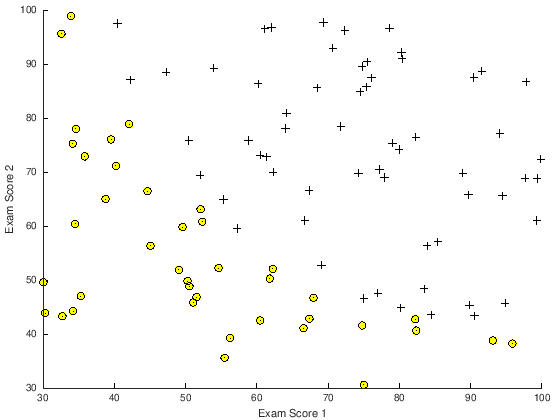

In [106]:
plotData(X,y)              
hold on;                        % We purposely didn't put the xlabel, ylabel commands in the function
xlabel("Exam Score 1")          % So that you could use your function again in the second part of the exercise below
ylabel("Exam Score 2")

Implementing the Sigmoid Function
--------------

Before you start with the actual cost function, recall that the logistic
regression hypothesis is defined as:
$$h_{\theta}(x) = g(\theta^{T}x),$$
where function $g$ is the sigmoid function. 
Your first step is to implement this function in the cell below so it
can be called by the rest of your program. When you are finished, try
testing a few values by calling sigmoid(x) for some value of x in the cell below it.
For large positive values of x, the sigmoid should
be close to 1, while for large negative values, the sigmoid should be
close to 0. Evaluating sigmoid(0) should give you exactly 0.5.
Your code should also work with vectors and matrices. For a matrix, your function should perform the sigmoid function on every element.

J = sigmoid(z) computes the sigmoid of every value of z.

In [107]:
% GRADED FUNCTION: sigmoid
function g = sigmoid(z)

g = zeros(size(z));     % return this correctly

% ====================== YOUR CODE HERE ======================

g = 1./(1+ exp(-z));

% =============================================================

end

In [108]:
sigmoid(0)
sigmoid(100)

ans =  0.50000
ans =  1


### Cost function and gradient

Now you will implement the cost function and gradient for logistic
regression. Complete the code in the function below to return the
cost and gradient.


Note that while this gradient looks identical to the linear regression
gradient, the formula is actually different because linear and logistic
regression have different definitions of $h_{\theta}(x)$. In this case, our $h_{\theta}(x)$ will be our sigmoid function.

**Implementation Note**:

[J, grad] = costFunction(theta, X, y) computes the cost of using theta as the parameter for logistic regression and the gradient of the cost w.r.t. to the parameters.

You should set J to the logistic regression cost. You should compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta. **Hint:** Don't forget to use element wise multiplication (.*) where necessary.

In [109]:
% GRADED FUNCTION: costFunction
function [J, grad] = costFunction(theta, X, y)

m = length(y);                   % number of training examples

J = 0;                           % set it correctly
grad = zeros(size(theta));       % set it correctly

% ====================== YOUR CODE HERE ======================
z = X * theta; % m x 1
h = sigmoid(z); % m x 1
c = -log(h.*y + (h-1).*(y-1));

J = 1/m * sum(c);
grad = (1/m * ((h-y)' * X))';
% ============================================================

end

In [110]:
[m, n] = size(X);                     % Setup the data matrix appropriately
X = [ones(m, 1) X];                    % Add intercept term 
initial_theta = zeros(n + 1, 1);       % Initialize fitting parameters
[cost, grad] = costFunction(initial_theta,X,y)
cost;

cost =  0.69315
grad =

   -0.10000
  -12.00922
  -11.26284



**Expected Output **

You should see that the cost is
about ***0.693***.

You should see that the grad is equal to:
$ \begin{pmatrix}
  -0.10000 \\
   -12.00922 \\
  -11.26284
 \end{pmatrix}$

### Learning parameters using fminunc

In the previous assignment, you found the optimal parameters of a linear
regression model by implementing gradient descent. You wrote a cost
function and calculated its gradient, then took a gradient descent step
accordingly. This time, instead of taking gradient descent steps, you
will use an Octave/MATLAB built-in function called fminunc.

Octave/MATLAB’s fminunc is an optimization solver that finds the
minimum of an unconstrained function. For logistic regression, you
want to optimize the cost function $J(\theta)$ with respect to the parameters $\theta$.

Concretely, you are going to use fminunc to find the best
parameters $\theta$ for the logistic regression cost function, given a
fixed dataset (of $X$ and $y$ values). You will pass to fminunc
the following inputs:

-   The initial values of the parameters we are trying to optimize.

-   A function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset ($X$, $y$)

We already have code written to call fminunc
with the correct arguments.


In [111]:
% Run Optimset                     
options = optimset('GradObj', 'on', 'MaxIter', 400);    %  Set options for fminunc

%  Run fminunc to obtain the optimal theta
%  This function will return theta and the cost 
[theta, cost] = fminunc(@(t)(costFunction(t, X, y)), initial_theta, options)

theta =

  -25.16127
    0.20623
    0.20147

cost =  0.20350


**Expected Output**

You should see that the cost is about 0.203.


In the code above, we first defined the options to be used with
fminunc. Specifically, we set the GradObj option to
'on', which tells fminunc that our function returns both the
cost and the gradient. This allows fminunc to use the gradient
when minimizing the function. Furthermore, we set the 'MaxIter'
option to 400, so that 'fminunc' will run for at most 400 steps
before it terminates.

To specify the actual function we are minimizing, we use a “short-hand”
for specifying functions with the @(t)(costFunction(t, X, y)). This creates a function, with argument t, which calls your costFunction. This allows us to wrap the costFunction for use
with fminunc.

If you have completed the costFunction correctly, fminunc
will converge on the right optimization parameters and return the final
values of the cost and $\theta$. Notice that by using fminunc,
you did not have to write any loops yourself, or set a learning rate
like you did for gradient descent. This is all done by fminunc:
you only needed to provide a function calculating the cost and the gradient.

### Plotting the Decision Boundary

Now, that you have computed your theta, we will use it to plot the decision boundary. You will not have to write any code, however, we would like you to take a look at how we plotted the boundary line. If you implemented the previous parts correctly, you should see the following plot: 
<img src="../readonly/Assignment2/figure 2.png"  width="450" height="450">

The function plotDecisionBoundary(theta,X,y) plots the data points X and y into a new figure with
the decision boundary defined by theta. It plots the data points with + for the positive examples and o for the negative examples. X is assumed to be either an M x 3 matrix, where the first column is all ones (for the intercept) or an M x N (N > 3) matrix, where the first column is still all ones. You could find the plotDecisionBoundary function by going to your workspace (File ==> Open).


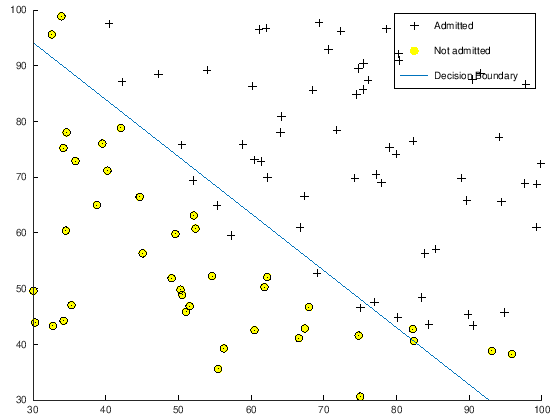

In [112]:
% Plot the Decision Boundary 
plotDecisionBoundary(theta, X, y);       

### Evaluating Logistic Regression
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For example you will predict the admission rate of a student who has an Exam 1 score of 45 and an Exam 2 score of 85. Run the cell below to see if your output matches the expected output. 

In [113]:
prob = sigmoid([1 45 85] * theta)

prob =  0.77629


***Expected Output:*** 

0.776

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in predict.m. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector θ.
After you have complete the function below, you will get to see the accuracy of your classifier by computing the percentage of examples it got correct.

**Instructions**

You should predict whether the label is 0 or 1 using the learned logistic regression parameters theta.

p = predict(theta, X) computes the predictions for X using a threshold at 0.5

You should set p to a vector of zeros and ones. 


In [114]:
% GRADED FUNCTION: predict
function p = predict(theta, X)

m = size(X, 1);                     % Number of training examples
p = zeros(m, 1);                    % Return the following variable correctly

% ====================== YOUR CODE HERE ======================
res = X * theta;
p = (res > 0);
% =============================================================

end

In [115]:
p = predict(theta, X);                       % Calling your function
Accuracy = mean(double(p == y)) * 100        % Calculating the Accuracy

Accuracy =  89



***Expected Output***:

Accuracy = 89 %

# Regularized Logistic Regression 

In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.

Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

## Visualizing the data 

Similar to the previous parts of this exercise, plotData is used to generate a figure like Figure 3, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers.
<img src="../readonly/Assignment2/figure 3.png"  width="450" height="450">

Figure 3 shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary. Run the cells below to see a plot of your new data. 

In [116]:
% Load the Variables
data = load('ex2data2.txt');
X = data(:, [1, 2]); 
y = data(:, 3);

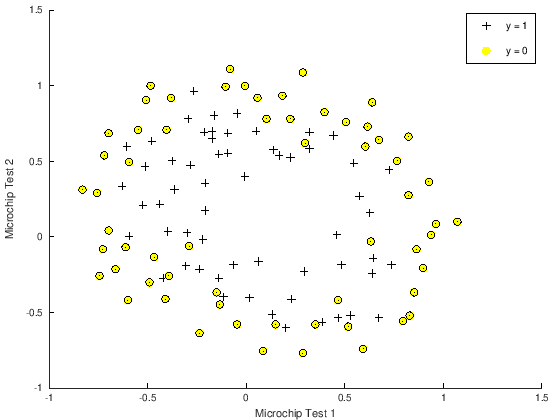

In [117]:
plotData(X,y)
hold on;                                              
xlabel('Microchip Test 1')      % Labels and Legend
ylabel('Microchip Test 2')
legend('y = 1', 'y = 0')
hold off;

## Feature mapping
One way to fit the data better is to create more features from each data point. In the provided function mapFeature, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$\mathrm{mapFeature}(x) = 
\left[\begin{array}{c}
1\\
x_1\\
x_2\\
x_1^2\\
x_1 x_2\\
x_2^2\\
x_1^3\\
\vdots\\
x_1 x_2^5\\
x_2^6\end{array}\right]$$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier, it is also more susceptible to overfitting. We have provided the mapFeature function for you below. 

**About the Function:**

MapFeature(X1, X2) maps the two input features to quadratic features used in the regularization exercise.

Returns a new feature array with more features, comprising of $x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1x_2^2$  etc...

Inputs $x_1, x_2$ must be the same size.


In [118]:
function out = mapFeature(X1, X2)

degree = 6;
out = ones(size(X1(:,1)));
for i = 1:degree
    for j = 0:i
        out(:, end+1) = (X1.^(i-j)).*(X2.^j);
    end
end

end

## Cost function and gradient

In this part, you are given a dataset with data points that are not linearly separable. However, you would still like to use logistic regression to classify the data points. To do so, you introduce more features to use, in particular, you add polynomial features to our data matrix (similar to polynomial regression). You will implement regularized logistic regression to fit the data. In doing this, you will see how regularization can help combat the overfitting problem.


Note that you should not regularize the parameter $\theta_0$. In
**Octave/MATLAB**, indexing starts from 1, hence, you should
not be regularizing the theta(1) parameter (which corresponds to
$\theta_0$) in the code. The gradient of the cost function is a vector
where the $j^\mathrm{th}$ element is defined as follows:

$$\frac{\partial J(\theta)}{\partial\theta_0} = \frac{1}{m}  \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \quad\quad\quad\quad\quad\quad \mbox{for $j = 0$}$$

$$\frac{\partial J(\theta)}{\partial\theta_j} = \left( \frac{1}{m}  \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)}) x_j^{(i)} \right) + \frac{\lambda}{m} \theta_j  \quad\, \mbox{for $j \geq 1$}$$

Once you are done implementing costFunctionReg, run your function using the initial value of $\theta$
(initialized to all zeros). 

**Implementation**

Compute cost and gradient for logistic regression with regularization.

J = costFunctionReg(theta, X, y, lambda) computes the cost of using theta as the parameter for regularized logistic regression and the gradient of the cost w.r.t. to the parameters. Then, compute the partial derivatives and set grad to the partial derivatives of the cost w.r.t. each parameter in theta.


In [119]:
% GRADED FUNCTION: costFunctionReg
function [J, grad] = costFunctionReg(theta, X, y, lambda)

m = length(y);                % Number of training examples
J = 0;                        % Set J to the regularized cost in logistic regression
grad = zeros(size(theta));    % Set grad to the regularized gradient of logistic regression

% ====================== YOUR CODE HERE ======================
h = sigmoid(X * theta);
basic_J = 1/m * (-y' * log(h) - (1-y)' * log(1-h));
reg_J = lambda/(2*m) * sum(theta(2:end).^2);
J = basic_J + reg_J;

basic_grad = (1/m * ((h-y)' * X))';
reg_grad = (lambda/m * theta);
grad = basic_grad + [0; reg_grad(2:end)];

% =============================================================

end

In [120]:
X = mapFeature(X(:,1), X(:,2));                            % Add Polynomial Features (it adds the intercept term)
initial_theta = zeros(size(X, 2), 1);                      % Initialize fitting parameters
lambda = 1;                                                % Set regularization parameter lambda to 1
cost = costFunctionReg(initial_theta, X, y, lambda)

cost =  0.69315



**Expected Output:**

You should see that the cost is about **0.693**

## Learning parameters using fminunc

Similar to the previous parts, you will use fminunc to learn the optimal parameters θ. If you have completed the cost and gradient for regularized logistic regression correctly, you should be able to step through the next cell to learn the parameters θ using fminunc. After training our theta, we will use it to plot the decision boundary. You will get to to experiment with different values for lambda.


In [121]:
initial_theta = zeros(size(X, 2), 1);                % Initialize fitting parameters
lambda = 1;                                          % Set regularization parameter lambda to 1 (you should vary this)
options = optimset('GradObj', 'on', 'MaxIter', 400); % Set Options


[theta, J, exit_flag] = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options);
J

J =  0.52900


### Plotting the decision boundary
To help you visualize the model learned by this classifier, we will use our [plotDecisionBoundary](plotDecisionBoundary.m) function which plots the (non-linear) decision boundary that separates the positive and negative examples. In the function, we plotted the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then drew a contour plot of where the predictions change from y = 0 to y = 1.
After learning the parameters θ, the next step is to plot a decision boundary similar to Figure 4.

<img src="../readonly/Assignment2/figure 4.png"  width="450" height="450">

Accuracy =  83.051


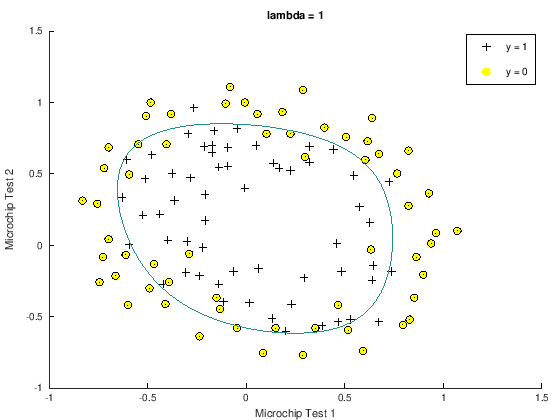

In [122]:
% Plot the Decision Boundary
plotDecisionBoundary(theta, X, y);
hold on;
title(sprintf('lambda = %g', lambda))             % Labels and Legend    
xlabel('Microchip Test 1')
ylabel('Microchip Test 2')
legend('y = 1', 'y = 0', 'Decision boundary')
hold off;

p = predict(theta, X);                            % Get the prediction
Accuracy =  mean(double(p == y)) * 100            % Accuracy 

## Optional Exercises 

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary λ. With a small λ, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data (Figure 5). This is not a good decision boundary: for example, it predicts that a point at x = (−0.25, 1.5) is accepted (y = 1), which seems to be an incorrect decision given the training set.

<img src="../readonly/Assignment2/figure 5.png"  width="450" height="450">
With a larger λ, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if λ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data (Figure 6).

<img src="../readonly/Assignment2/figure 6.png"  width="450" height="450">

You should go up to the section under **Learning parameters using fminunc** and change the lambda value to see the figures above. Feel free to try out different lambda values.